<a href="https://www.kaggle.com/code/emanoelcarvalholopes/uci-oulad-students-performance-prediction?scriptVersionId=218091037" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Apresentação

Este notebook visa elaborar um modelo de predição da nota final dos estudantes utilizando modelos de aprendizado de máquina. O trabalho norteador deste é o artigo intitulado [Mineração de dados educacionais com aprendizagem de máquina][1], autoria de Vanessa Faria de Souza, no qual utiliza um conjunto de dados disponível em [UCI Machine Learning Repository (UCI)][2], de autoria de Paulo Cortez e Alice Silva, que publicaram o artigo [USING DATA MINING TO PREDICT SECONDARY SCHOOL STUDENT PERFORMANCE][3]. Este mesmo _dataset_ foi utilizado por Ali (2023), um dos estudos selecionados na revisão sistemática de literatura, que será um capítulo da minha dissertação de mestrado.

Outro dataset que será utilizado é o [Open University Learning Analytics dataset][4] que "contém dados sobre cursos, alunos e suas interações com o Ambiente Virtual de Aprendizagem (AVA) para sete cursos selecionados (chamados de módulos). O conjunto de dados consiste em tabelas conectadas por meio de identificadores exclusivos. Todas as tabelas são armazenadas no formato csv." Segundo Vanessa (2021, p. 771) “coletada entre 2013 e 2014 pela OpenUniversitydo Reino Unido, essa base compreende 7 cursos de graduação e contém atributos de mais de 32 mil alunos sobre: atividades avaliativas, notas, perfil demográfico e uma apresentação pessoal desses estudantes.” (Faria De Souza, 2021, p. 771). Este dataset foi explorado por Huang (2024) e Chui et al (2020), dedicou atenção ao uso de SVM como modelo preditivo.


Alguns dos algoritmos de AM para classificação mais conhecidos são: Naïve Bayes; Árvores de Decisão, Random Forest (RF) e Suport Vector Machines (SVM). (Faria de Souza, 2021). Segundo Tan (2009), os modelos de classificação podem ser úteis para prever ou descrever conjunto de dados com categorias nominais ou binárias.

Os dados da UCI serão obtidos por meio da instalação do repositório da UCI, por meio do comando: 

`!pip install ucimlrepo`

Referências

ALI, D. A.; ABORIZKA, M.; DAHROUG, A. Prediction of Student Performance by Using Machine Learning Techniques. 2023. **4th International Conference on Artificial Intelligence, Robotics and Control (AIRC)**. Anais... Em: 2023 4TH INTERNATIONAL CONFERENCE ON ARTIFICIAL INTELLIGENCE, ROBOTICS AND CONTROL (AIRC). Cairo, Egypt: IEEE, 9 maio 2023. Disponível em: <https://ieeexplore.ieee.org/document/10303160/>. Acesso em: 9 set. 2024

CHUI, K. T. et al. Predicting at-risk university students in a virtual learning environment via a machine learning algorithm. Computers in Human Behavior, v. 107, p. 105584, jun. 2020. 
    
FARIA DE SOUZA, V. (2021). Mineração de dados educacionais com aprendizagem de máquina. **Revista Educar Mais**, 5(4), 766–787. https://doi.org/10.15536/reducarmais.5.2021.2417

HUANG, Q.; CHEN, J. Enhancing academic performance prediction with temporal graph networks for massive open online courses. Journal of Big Data, v. 11, n. 1, p. 52, 13 abr. 2024.

TAN, Pang-Ning; STEINBACH, Michael; KUMAR, Vipin. **Introdução ao DATAMINING:/** mineração de dados. Rio de Janeiro: Ciência Moderna, 2009. xxi, 900 p. ISBN 978-85-7393-761-9

Kuzilek J., Hlosta M., Zdrahal Z. Open University Learning Analytics dataset Sci. Data 4:170171 doi: 10.1038/sdata.2017.171 (2017).

[1]: https://periodicos.ifsul.edu.br/index.php/educarmais/article/view/2417
[2]: https://archive.ics.uci.edu/dataset/320/student+performance
[3]: http://repositorium.sdum.uminho.pt/bitstream/1822/8024/1/student.pdf
[4]: https://analyse.kmi.open.ac.uk/open_dataset

# Sobre o conjunto de dados da UCI

Quadro 1 – Atributos da Base de dados

**ID**|**Atributos**|**Descrição**
:-----:|:-----|:-----
1|Escola|Escola do aluno (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)
2|Gênero|Gênero do aluno (binário: 'F' - feminino ou 'M' - masculino)
3|Idade|Idade do aluno (numérico: de 15 a 22)
4|Endereço|Tipo de endereço residencial do aluno (binário: 'U' - urbano ou 'R '- rural)
5|Famsize|Tamanho da família (binário:' LE3 '- menor ou igual a 3 ou' GT3 '- maior que 3)
6|Pstatus|Status de coabitação dos pais (binário:' T '- morando junto ou' A '- à parte)
7|Medu|Escolaridade da mãe (numérico: 0 - nenhum, 1 - ensino fundamental (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)
8|Fedu|Escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino primário (4º ano), 2 - 5º ao 9º ano, 3 - ensino secundário ou 4 - ensino superior)
9|Mjob|Trabalho da mãe (nominal: 'professor', 'saúde' relacionado, 'serviços'  civis (por exemplo, administrativo ou policial), 'em\_casa' ou 'outro')
10|Fjob|Trabalho  do  pai  (nominal:  'professor',  'saúde'  relacionado,  civil  'serviços'  (por exemplo, administrativo ou policial), 'em\_ casa' ou 'outro')
11|Razão|Razão  para  escolher  esta  escola  (nominal:  perto  de  'casa',  escola  'reputação', 'curso' preferência ou 'outro')
12|Tutor|Tutor do aluno (nominal: 'mãe', 'pai' ou 'outro' )
13|Tempo     de Viagem|Tempo de viagem de casa para a escola (numérico: 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. A 1 hora, ou 4 -> 1 hora)
14|Horas       de Estudo|Tempo de estudo semanal (numérico: 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas ou 4 -> 10 horas)
 | | 
15|Reprovações|Número de reprovações anteriores nas aulas (numérico: n se 1 <= n <3, senão 4)
16|Schoolup|Suporte educacional extra (binário: sim ou não)
17|Famsup|Suporte educacional familiar (binário: sim ou não)
18|Pago|Aulas extras pagas dentro da disciplina (matemática ou português) (binário: sim ou não)
19|Atividades|Atividades extracurriculares (binário: sim ou não)
20|Creche|Cursou creche (binário: sim ou não)
21|Superior|Deseja cursar o ensino superior (binário: sim ou não)
22|Internet|Acesso à internet em casa (binário: sim ou não)
23|Romântico|Com um relacionamento romântico (binário: sim ou não)
24|Famrel|Qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)
25|Tempo Livre|Tempo livre depois da escola (numérico: de 1 - muito baixo a 5 - muito alto)
26|Gooout|Saindo com os amigos (numérico : de 1 - muito baixo a 5 - muito alto)
224|Dalc|Consumo de álcool durante o trabalho (numérico: de 1 - muito baixo a 5 - muito alto)
28|Walc|Consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)
29|Saúde|Estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)
30|Faltas|Número de faltas na escola (numérico: de 0 a 93)
32|G1|Nota do primeiro período (numérico: de 0 a 20)
32|G2|Nota do segundo período (numérico: de 0 a 20)
33|G3|Nota final (numérico: de 0 a 20, alvo de saída)

Fonte: Adaptado de Faria de Souza, 2021.
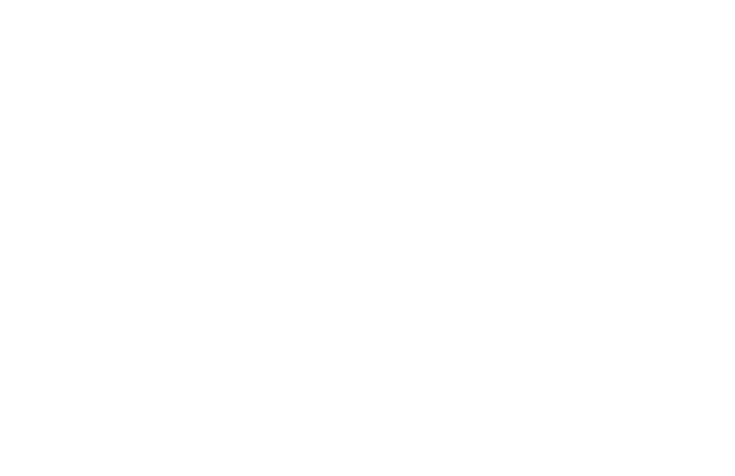
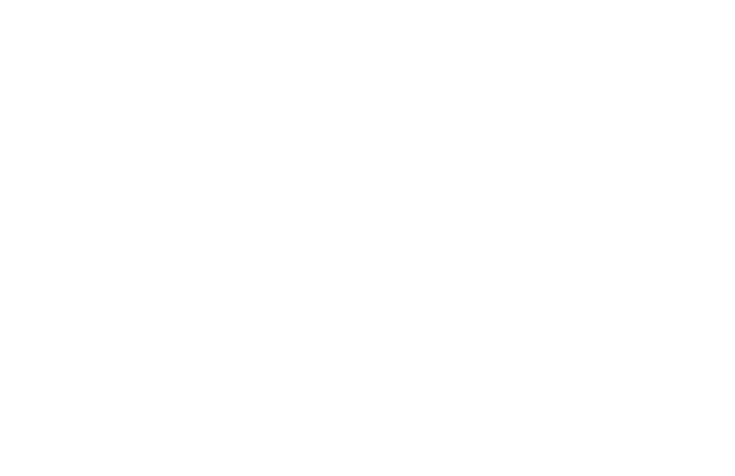
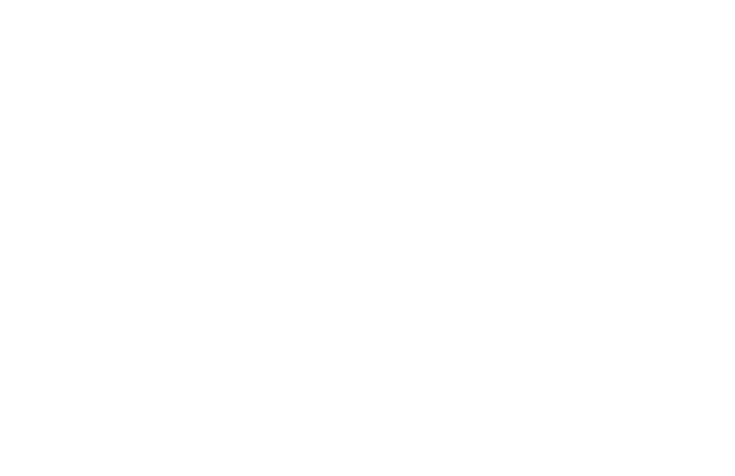

# 0. Importando as bibliotecas necessárias

In [3]:
# importando as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")


# 1. Obtenção de dados

## 1.1 Obtendo os dados da UCI

> “Na primeira etapa os dados foram coletados do repositório de dados público o UCIMachineLearning. Estes dados abordam o desempenho dos alunos no ensino secundário de duas escolas portuguesas.” (Faria De Souza, 2021, p. 773)

In [4]:
# Os dados serão obtidos por meio da instalação do repositório da UCI, por meio do comando:

!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
students = fetch_ucirepo(id=320) 

São retornados, dois conjuntos de dados: features e targets. 30 colunas e 3 colunas, respectivamente.

In [6]:
students.data.features.shape

(649, 30)

In [7]:
students.data.targets.shape

(649, 3)

Comparando a quantidade de linhas com o estudo da Faria de Souza (2021), constata-se uma diferença significativa - apenas 649 ao invés de 1044 como apontado no artigo. 

## 1.1.1 Junção dos dados

No estudo de Faria de Souza (2021), a primeira providência na preparação dos dados foi unir os conjuntos de dados em um só. O bloco abaixo realizará esta tarefa:

In [22]:
# Junção das duas bases de dados 
# students.data.features + students_data.targets 

students_full_uci = pd.merge(students.data.features,students.data.targets, left_index = True, right_index = True, how = 'inner')

Com o _dataset_ unificado, iremos obter informações.

In [23]:
students_full_uci.shape

(649, 33)

## 1.1.2 Visualizar os dados para obter informações

In [10]:
# As cinco primeiras linhas do conjunto de dados unificado.

students_full_uci.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
# Rápida descrição dos dados com o tipo de cada atributo e o número de valores não nulos.

students_full_uci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

Note que o _dataset_ possui variáveis/atributos categóricos e numéricos. Portanto, será necessário transformar os dados categóricos antes de treinar qualquer modelo de aprendizagem de máquina, pois estes preferem trabalhar com dados numéricos (Géron, 2019). 

In [12]:
# Podemos visualizar as informações estatísticas dos atributos numéricos.

students_full_uci.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


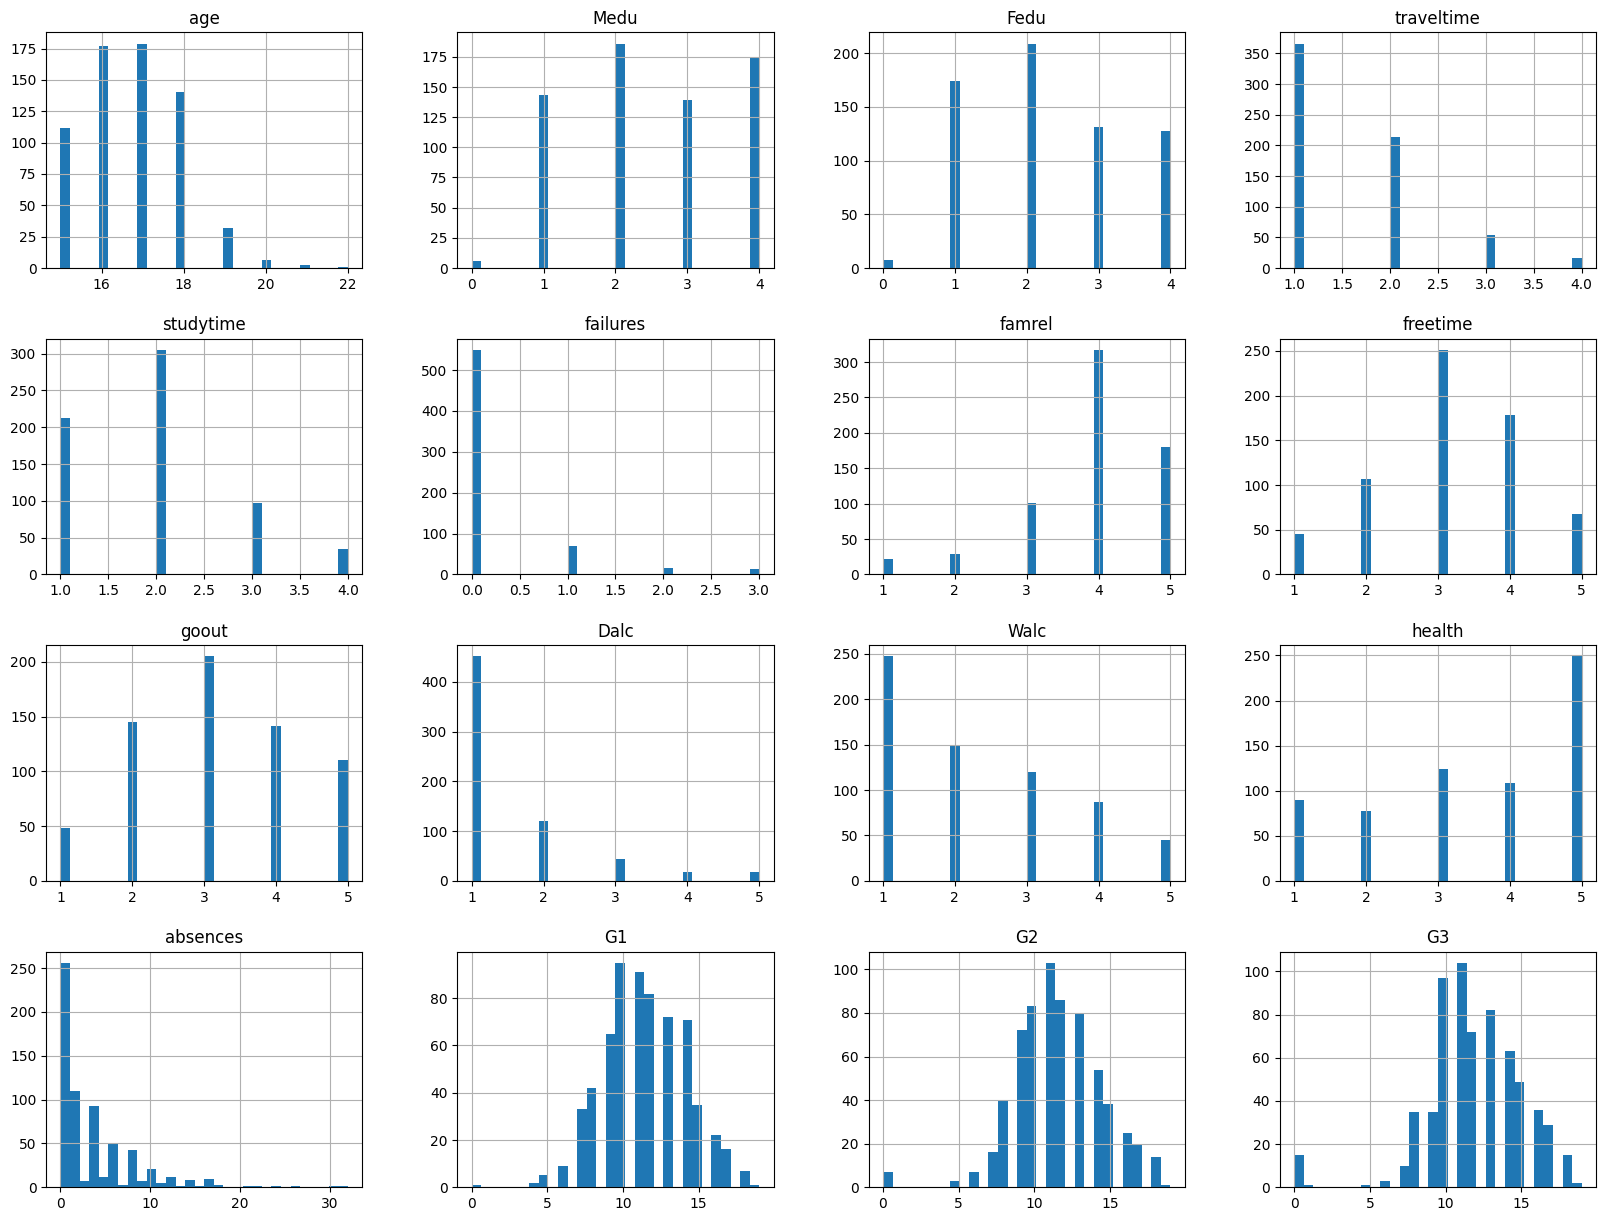

In [24]:
# Um histograma para cada atributo numérico

students_full_uci.hist(bins=30, figsize=(20,15))
plt.show()

Um ponto interessante a observar é que quase 250 estudantes não possuem registros de faltas mas alguns estudantes possuem mais de dez faltas e isso pode provocar um viés na amostragem, levando o algoritmo de aprendizado de máquina aprender que as faltas não possuem correlação com o nota final do estudante. Considerando que Faria de Souza (2021) aponta as faltas como um atributo importante para prever a nota final, assim é importante garantir que o conjunto de testes seja representativo. 


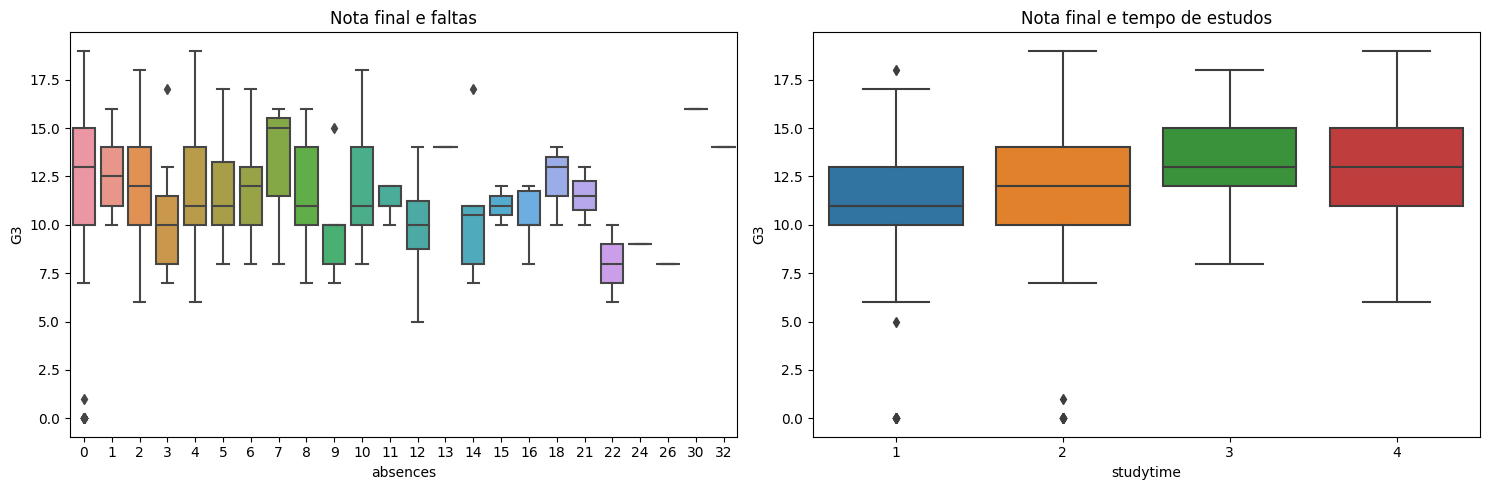

In [14]:
plt.figure(figsize=(15, 5))

# Nota final e faltas
plt.subplot(1, 2, 1)
sns.boxplot(x='absences', y='G3', data=students_full_uci)
plt.title('Nota final e faltas')

# Nota final e tempo de estudos
plt.subplot(1, 2, 2)
sns.boxplot(x='studytime', y='G3', data=students_full_uci)
plt.title('Nota final e tempo de estudos')

plt.tight_layout()
plt.show()

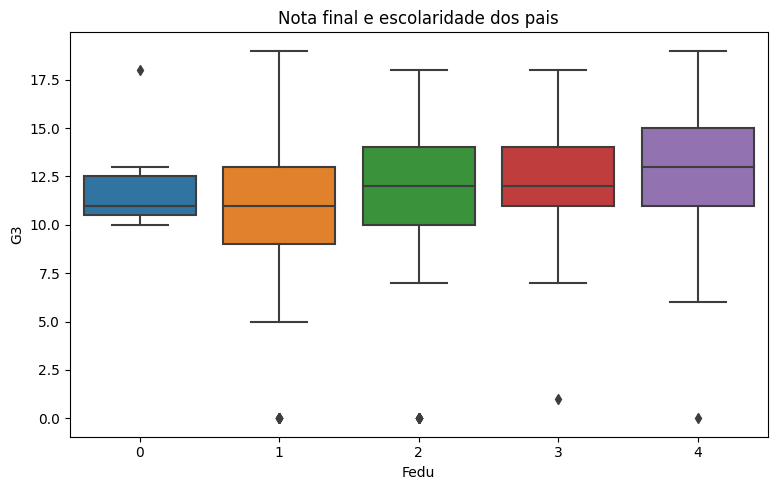

In [15]:
plt.figure(figsize=(15, 5))

# Nota final e escolaridade do pai
plt.subplot(1, 2, 1)
sns.boxplot(x='Fedu', y='G3', data=students_full_uci)
plt.title('Nota final e escolaridade dos pais')


plt.tight_layout()
plt.show()

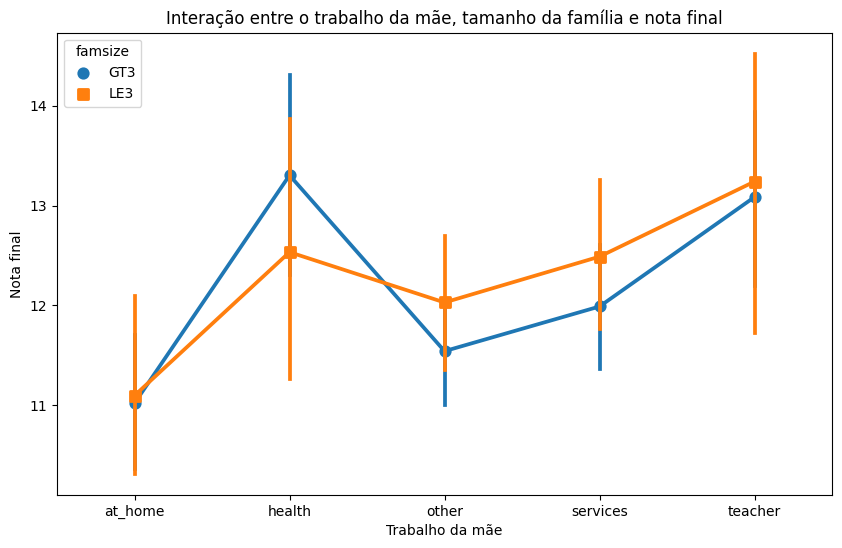

In [16]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Mjob', y='G3', hue='famsize', data=students_full_uci, 
              dodge=False, markers=["o", "s"], linestyles=["-", "-"])
plt.title('Interação entre o trabalho da mãe, tamanho da família e nota final')
plt.xlabel('Trabalho da mãe')
plt.ylabel('Nota final')
plt.show()

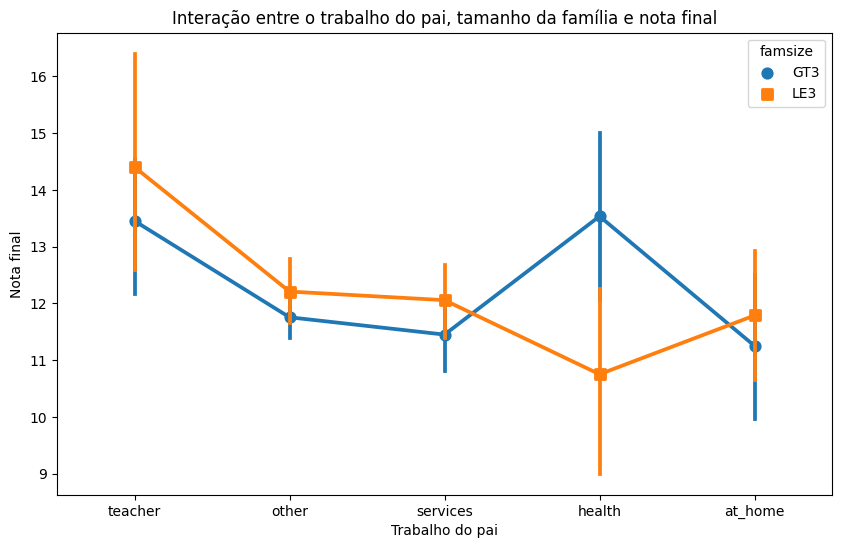

In [17]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Fjob', y='G3', hue='famsize', data=students_full_uci, 
              dodge=False, markers=["o", "s"], linestyles=["-", "-"])
plt.title('Interação entre o trabalho do pai, tamanho da família e nota final')
plt.xlabel('Trabalho do pai')
plt.ylabel('Nota final')
plt.show()

Famílias onde a mãe atua na área da saúde e o pai é professor, apresentaram notas finais mais elevadas.

# 3. Preparação dos dados 

## 3.1 UCI

Primeiramente, será acrescentada uma nova coluna com níveis de classificação, para a nota final G3, como indicado por Faria de Souza (2021): notas entre 20 e 16 = “A”, notas entre 15 e 11 = “B”, notas entre 10 e 4 = “C”, notas entre 4 e 0 = “D”.

In [25]:
# Função para classificar as notas em faixas: A, B, C e D
def classificar(nota):
    if 16 <= nota <= 20:
        return 'A'
    elif 11 <= nota <= 15:
        return 'B'
    elif 4 <= nota <= 10:
        return 'C'
    elif 0 <= nota < 4:
        return 'D'

# Aplicar a função para criar a coluna G3_class
students_full_uci['G3_class'] = students_full_uci['G3'].apply(classificar)

# Separar a classe alvo das variáveis independentes para regressão
y_reg = students_full_uci['G3']  # Regressão
X = students_full_uci.drop(['G3', 'G3_class'], axis=1)

# Codificar variáveis categóricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)], remainder='passthrough')
X_transformed = preprocessor.fit_transform(X)

O próximo passo é dividir o conjunto de dados em treinamento e testes e separar a classe alvo das variáveis independentes. Para esta tarefa, será utilizada a função `train_test_split` do Scikit-Learn, reservando 20% para teste.

In [19]:
# Criar as variáveis de treinamento e teste para regressão
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_transformed, y_reg, train_size=0.8, test_size=0.2, random_state=42)

# 4. Criar e treinar modelos de regressão

Modelos de regressão são treinados e avaliados com métricas como MSE, MAE e R²

In [20]:
# Modelos de Regressão
regression_models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
}

# Avaliar modelos de regressão
regression_results = []
for model_name, model in regression_models.items():
    model.fit(X_train, y_train_reg)
    y_pred_reg = model.predict(X_test)
    
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    
    regression_results.append({"Model": model_name, "MSE": mse, "MAE": mae, "R2": r2})

In [21]:
# Criar as variáveis de treinamento e teste para classificação
y_class = students_full_uci['G3_class']  # Classificação
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_transformed, y_class, train_size=0.8, test_size=0.2, random_state=42)

# Modelos de Classificação
classification_models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
}

# Avaliar modelos de classificação
classification_results = []
for model_name, model in classification_models.items():
    model.fit(X_train_class, y_train_class)
    y_pred_class = model.predict(X_test_class)
    
    accuracy = accuracy_score(y_test_class, y_pred_class)
    report = classification_report(y_test_class, y_pred_class, output_dict=True)
    
    classification_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": report['A']['precision'],
        "Recall": report['A']['recall'],
        "F1-Score": report['A']['f1-score'],
    })

# Resultados de Regressão
regression_results_df = pd.DataFrame(regression_results)
print("Resultados de Regressão:")
print(regression_results_df)

# Resultados de Classificação
classification_results_df = pd.DataFrame(classification_results)
print("\nResultados de Classificação:")
print(classification_results_df)

Resultados de Regressão:
                     Model       MSE       MAE        R2
0        Linear Regression  1.475909  0.765060  0.848651
1  Decision Tree Regressor  2.730769  0.853846  0.719970
2  Random Forest Regressor  1.582463  0.760000  0.837725

Resultados de Classificação:
                      Model  Accuracy  Precision    Recall  F1-Score
0       Logistic Regression  0.807692   0.695652  0.727273  0.711111
1  Decision Tree Classifier  0.823077   0.791667  0.863636  0.826087
2  Random Forest Classifier  0.838462   1.000000  0.772727  0.871795


Modelos de regressão: O modelo de Regressão Linear apresenta o menor MSE, indicando que ele tem os menores erros quadráticos médios nas previsões. O MAE também é mais baixo para a Regressão Linear, indicando que, em média, as previsões estão mais próximas dos valores reais em comparação aos outros modelos. O R² indica a proporção da variância que é explicada pelo modelo. A Regressão Linear tem o maior R², sugerindo que ela explica melhor a variância dos dados em comparação aos outros modelos.

Modelos de classificação: A acurácia é a proporção de previsões corretas. O Random Forest Classifier tem a maior acurácia, indicando que ele acerta mais previsões do que os outros modelos. A precisão indica a proporção de verdadeiros positivos sobre o total de positivos previstos. O Random Forest Classifier tem uma precisão perfeita, o que significa que todas as previsões positivas foram corretas.     O recall indica a proporção de verdadeiros positivos em relação ao total de positivos reais. O Decision Tree Classifier tem o maior recall, indicando que ele consegue identificar uma maior parte dos positivos reais.  O F1-score é a média harmônica de precisão e recall. O Random Forest Classifier tem o maior F1-score, indicando um bom equilíbrio entre precisão e recall.

# 5. Resultados

* Linear Regression é o modelo que apresenta o melhor desempenho com o menor MSE, MAE e o maior R².

* Random Forest Classifier é o modelo com a melhor acurácia, precisão e F1-score.

# 6. Conclusão

* A Regressão Linear é a melhor escolha para prever notas contínuas, pois oferece o menor erro em suas previsões.

* O Random Forest Classifier é o melhor modelo para classificar as notas em faixas, pois maximiza tanto a precisão quanto a recuperação.